# PYTHON-12. Продвинутые методы

## 1. Введение

<center>$\color{green}{\text{ВСПОМНИМ, С КАКИМИ ДАННЫМИ МЫ РАБОТАЕМ}}$</center>

Мы совершили множество преобразований над нашей таблицей — давайте вспомним их:

- удалили столбцы index и Coordinates;
- создали признак средней площади одной комнаты MeanRoomsSquare и ввели коэффициент соотношения площади здания к площади участка — AreaRatio;
- преобразовали признак даты продажи Date в формат datetime и создали на его основе следующие столбцы: номер месяц продажи (MonthSale), номер дня недели продажи (WeekdaySale), «признак-мигалку» выходного дня (Weekend);
- заменили признак года постройки здания YearBuilt на его возраст AgeBuilding;
- извлекли из признака адреса объекта Address новый признак подтипа улицы StreetType и удалили столбец с адресом;
- уменьшили число уникальных наименований агентств по недвижимости (SellerG), а также число пригородов (Suburb);
- выделили категориальные признаки и преобразовали их в тип данных сategory;
- заменили сокращённые названия категорий признака типа объекта Type на их полные названия (h — house, t —  townhouse, u — unit).

In [2]:
# Прочитаем преобразованный набор данных:
import pandas as pd

melb_df = pd.read_csv('C:\Курс DS-3.0\IDE\Python_12\data\melb_data_fe.csv', sep=',')
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

! Обратите внимание, что наше преобразование столбцов к типам *datetime* и *category* «слетело».

Ответ на самом деле очень прост: csv-файл не хранит в себе информацию о типах данных столбцов, поэтому при чтении Pandas автоматически определяет тип данных столбца.

## 2. Сортировка данных в DataFrame

<center>$\color{green}{\text{МЕТОД SORT_VALUES()}}$</center>

Для сортировки значений в DataFrame по значениям одного или нескольких столбцов используется метод sort_values():

- by — имя или список имён столбцов, по значениям которых производится сортировка.
- axis — ось, по которой производится сортировка (0 — строки, 1 — столбцы). По умолчанию сортировка производится по строкам.
- ascending — сортировка по возрастанию (от меньшего к большему). По умолчанию параметр выставлен на True, для сортировки по убыванию (от большего к меньшему) необходимо выставить его на False.
- ignore_index — создаются ли новые индексы в таблице. По умолчанию выставлен на False и сохраняет индексы изначальной таблицы.
- inplace — производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на False, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на True.

### СОРТИРОВКА ПО ЗНАЧЕНИЯМ ОДНОГО СТОЛБЦА

In [5]:
# Отсортируем таблицу по возрастанию цены объектов недвижимости (Price):
melb_df.sort_values(by="Price").head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,...,144.89000,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,...,145.02420,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,...,144.82660,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,...,144.96580,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,...,145.03730,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,...,144.95188,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,...,144.89587,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,...,144.86720,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,...,144.82720,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,...,144.82390,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1


!!! Обратите внимание на индексы таблицы — их значения сохранились из исходной таблицы.

In [6]:
melb_df.sort_values(by='Date', ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
11144,Northcote,4,house,1955000.0,SP,McGrath,2017-12-08,5.3,3070,4,...,144.99375,Northern Metropolitan,11364,12.600000,0.923664,12,47,4,St,0
11217,Surrey Hills,3,house,1775000.0,PI,Jellis,2017-12-08,10.2,3127,3,...,145.08968,Southern Metropolitan,5457,15.750000,-0.721854,12,47,4,Rd,0
11206,St Kilda,4,house,1600000.0,VB,Gary,2017-12-08,5.0,3182,4,...,144.98324,Southern Metropolitan,13240,16.000000,-0.586028,12,107,4,St,0
11207,Strathmore,7,house,2000000.0,SP,Nelson,2017-12-08,8.2,3041,7,...,144.90587,Western Metropolitan,3284,20.882353,-0.262721,12,18,4,Rd,0
11208,Strathmore,4,house,1610000.0,S,other,2017-12-08,8.2,3041,4,...,144.92243,Western Metropolitan,3284,24.909091,-0.517181,12,62,4,St,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Camberwell,4,house,2650000.0,S,Jellis,2016-03-09,7.8,3124,4,...,145.06860,Southern Metropolitan,8920,18.900000,-0.550535,3,126,2,Rd,0
4510,Oak Park,3,house,892000.0,S,Nelson,2016-03-09,11.5,3046,3,...,144.91740,Northern Metropolitan,2651,18.000000,-0.714609,3,46,2,St,0
4388,Northcote,3,house,1200000.0,S,Nelson,2016-03-09,5.5,3070,3,...,144.99090,Northern Metropolitan,11364,17.857143,-0.264706,3,96,2,St,0
6184,Surrey Hills,3,house,1205000.0,S,Fletchers,2016-01-28,11.2,3127,3,...,145.10060,Southern Metropolitan,5457,18.000000,-0.590909,1,46,3,Rd,0


### СОРТИРОВКА ПО ЗНАЧЕНИЯМ НЕСКОЛЬКИХ СТОЛБЦОВ

Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр *by* в виде списка.<br>
отсортируем таблицу сначала по возрастанию расстояния от центра города (Distance), а затем — по возрастанию цены объекта (Price). Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов Distance и Price результирующей таблицы:

In [7]:
 melb_df.sort_values(by=['Distance','Price']).loc[::10, ['Distance','Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


### КОМБИНИРОВАНИЕ СОРТИРОВКИ С ФИЛЬТРАЦИЕЙ

Найдём информацию о таунхаусах *(Type)*, проданных компанией *(SellerG) McGrath*, у которых коэффициент соотношения площадей здания и участка *(AreaRatio)* меньше -0.8. Результат отсортируем по дате продажи *(Date)* в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр **ignore_index** на *True*. Для наглядности результата выберем из таблицы только столбцы *Data* и *AreaRatio*:

In [ ]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending = [True, False],
     ignore_index = True
).loc[:, ['Date', 'AreaRatio']]

**Примечание:** старайтесь не сочетать фильтрацию и метод sort_values() с параметром inplace=True, так как в таком случае у вас возникнет предупреждение (warning) SettingWithCopyWarning: 

melb_df[melb_df['Rooms'] > 5].sort_values(inplace=True, by=['Rooms']) 
C:\Users\Andrey\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingwithCopyWarning:

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ indexing. html#retu rning-a-view-versus-a-copy

    return func(*args, **kwargs)

Pandas предупреждает вас о том, что при использовании такого кода дальнейшие результаты работы могут быть неожидаемыми.

Данное предупреждение предназначено для обозначения операций "цепного присваивания". Это ситуация, в которой вы пытаетесь напрямую изменить подмножество исходных данных. В нашем случае мы пытаемся отсортировать с заменой (об этом говорит параметр inplace=True) с заменой исходной таблицы на отсортированную.

Решается данная проблема очень просто: чтобы не возникало подобных конфликтов, мы используем метод copy(), для явного создания копии отфильтрованного подмножества исходных данных и работаем уже с ней (производим сортировку):

filtered = melb_df[melb_df['Rooms'] > 5].copy()

filtered.sort_values(inplace=True, by=['Rooms'])

## 3. Группировка данных в DataFrame

Одна из основных задач анализа данных — это группировка данных и сравнение показателей в группах.

В некоторых случаях группировки может быть достаточно, чтобы ответить на вопросы бизнеса. В других случаях это может стать первым шагом в более сложном анализе. Так, например, благодаря группировке мы можем выявлять признаки, которые не несут статистической значимости, или признаки, которые вносят наибольший вклад. 

<center>$\color{green}{\text{МЕТОД GROUPBY()}}$</center>

В библиотеке Pandas для группировки данных по одному или нескольким признакам можно использовать метод groupby().Основные параметры метода:

- by — имя или список имён столбцов, по которым производится группировка.
- axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.
- as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.

Метод **groupby()** возвращает объект *DataFrameGroupBy*, который хранит в себе информацию о том, какие строки относятся к определённой групп. К этому объекту можно применять уже знакомые нам агрегирующие методы (mean, median, sum и т. д.), чтобы рассчитывать показатели внутри каждой группы.
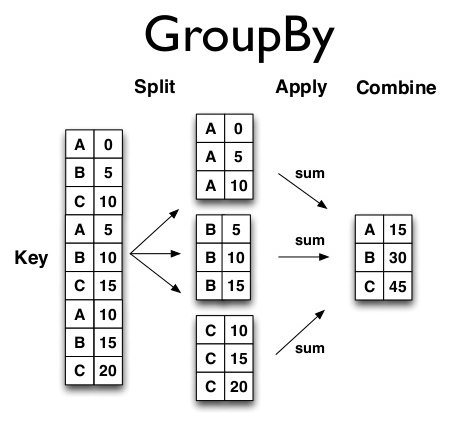

### ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С ОДНОЙ АГРЕГАЦИЕЙ

Применим агрегирующую функцию среднего к результату работы **groupby()**. В качестве столбца для группировки возьмём столбец типа объекта недвижимости *(Type)*:

In [15]:
melb_df.groupby(by='Type').mean()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,Weekend
Type,,,,,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,6.750873,55.669700,4.015769,0.689808
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,6.621185,26.690305,3.980251,0.681329
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,6.578721,39.703016,3.817368,0.646006


!!! Обратите внимание на структуру получившейся таблицы: теперь на месте индексов стоят значения типа объекта недвижимости *Type* (house, townhouse, unit).

**Примечание**. Если мы хотим видеть тип объекта в качестве отдельного столбца таблицы, мы можем выставить параметр **as_index** на *False*:

In [16]:
melb_df.groupby(by='Type', as_index=False).mean()

,Type,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,Weekend
0,house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,6.750873,55.669700,4.015769,0.689808
1,townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,6.621185,26.690305,3.980251,0.681329
2,unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,6.578721,39.703016,3.817368,0.646006


Агрегирующие методы можно применять только к интересующему нас столбцу. Давайте сравним средние цены на объекты в зависимости от их типа:

In [17]:
melb_df.groupby(by='Type')['Price'].mean()

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

**Примечание**. Обратите внимание, что, так как мы считаем только один показатель (среднее) для одного столбца, в результате мы получаем объект *Series*.

Из этой маленькой можно сделать вывод, что наибольшей средней ценой обладают объекты типа house (дома, коттеджи, виллы).

Теперь давайте выясним, какие регионы *(Regionname)* наиболее удалены от центра Мельбурна.

Для этого найдём минимальное значение расстояния от центра города до объекта в зависимости от его региона. Результат отсортируем по убыванию расстояния:

In [18]:
melb_df.groupby(by='Regionname')['Distance'].min().sort_values(ascending=False)

Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

**Вывод**: наиболее удалёнными являются все регионы Victoria.

### ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С НЕСКОЛЬКИМИ АГРЕГАЦИЯМИ

Чтобы рассчитать несколько агрегирующих методов, можно воспользоваться методом **agg()**, который принимает список строк с названиями агрегаций.

Давайте построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (Price), сгруппированных по номеру месяца продажи (MonthSale). Результат отсортируем по количеству продаж в порядке убывания:

In [3]:
melb_df.groupby('MonthSale')['Price'].agg(['count', 'mean','max']).sort_values(by='count', ascending=False)

,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


В результате применения метода **agg()**, в который мы передали список с названиями интересующих нас агрегирующих функций, мы получаем DataFrame со столбцами *count, mean и max*, где для каждого месяца рассчитаны соответствующие параметры. Результат сортируем по столбцу *count*.

Следующие выводы можно сделать из этой таблицы?

1. Пик продаж приходится на период весна-лето.

2. Средняя цена продаваемых объектов относительно стабильна и находится в пределах 1 млн. австралийских долларов с небольшими отклонениями (около 100 тыс. влево и вправо).

3. Прослеживается некоторая зависимость между сезоном и максимальной ценой объектов: в месяцы с большим спросом на объекты недвижимости цена также имеет наибольшие показатели. Можно сделать предположение, что это связано с повышением цен на элитные дома в периоды большого спроса.

**Примечание**. Если вам нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом **agg()**, передав в качестве его параметра строку **'describe'**:

In [5]:
melb_df.groupby('MonthSale')['Price'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
MonthSale,,,,,,,,
1,278.0,9.397921e+05,577668.924214,170000.0,570500.0,795000.0,1111250.0,5200000.0
2,333.0,1.169051e+06,671564.357417,131000.0,710000.0,1020000.0,1478000.0,4735000.0
3,1408.0,1.146762e+06,709573.596867,85000.0,680000.0,945000.0,1400000.0,5600000.0
4,1246.0,1.050479e+06,591892.902979,145000.0,655000.0,905500.0,1298750.0,5500000.0
5,1644.0,1.097807e+06,668492.867996,145000.0,650000.0,905000.0,1371250.0,8000000.0
6,1469.0,1.068981e+06,606010.069052,222000.0,660000.0,900000.0,1325000.0,7650000.0
7,1835.0,9.314698e+05,537390.803161,190000.0,586750.0,800000.0,1150000.0,9000000.0
8,1850.0,1.056371e+06,619617.476541,160000.0,635000.0,892000.0,1310000.0,6500000.0
9,1188.0,1.126349e+06,608734.690742,170000.0,725000.0,980000.0,1360000.0,6400000.0


После базовых математических функций наиболее частым агрегированием является подсчёт **числа уникальных значений**. Так, например, мы можем вычислить число уникальных риелторских компаний в зависимости от региона. 

Это можно сделать, передав в параметр метода **agg()** строку **'nunique'**. 

Более того, метод **agg()** поддерживает использование и других функций. Передадим дополнительно встроенную функцию *set*, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

In [7]:
melb_df.groupby('Regionname')['SellerG'].agg(['nunique', set])

,nunique,set
Regionname,,
Eastern Metropolitan,26,"{RW, McGrath, Nelson, Biggin, Love, Buxton, Ma..."
Eastern Victoria,11,"{C21, McGrath, Harcourts, Barry, HAR, O'Brien,..."
Northern Metropolitan,40,"{RW, McGrath, Raine, Burnham, Nelson, Sweeney,..."
Northern Victoria,11,"{Buckingham, McGrath, Barry, LITTLE, YPA, Rain..."
South-Eastern Metropolitan,25,"{RW, McGrath, O'Brien, Nelson, Biggin, Thomson..."
Southern Metropolitan,38,"{RW, McGrath, Raine, O'Brien, Nelson, Biggin, ..."
Western Metropolitan,34,"{Douglas, McGrath, RW, Raine, Burnham, O'Brien..."
Western Victoria,6,"{YPA, Raine, HAR, other, hockingstuart, Ray}"


Как и ожидалось, наименьшая конкуренция в наиболее удалённом регионе Western Victoria, а наибольшая — в центральном районе Northern Metropolitan.

## 4. Сводные таблицы

**Сводная таблица** принимает на вход данные из отдельных столбцов и группирует их. В результате получается новая таблица, которая позволяет увидеть многомерное обобщение данных. Таким образом, благодаря сводным таблицам мы можем оценить зависимость между двумя и более признаками данных.
Мы чаще сталкиваемся со сводными таблицами, чем с обычными, *в плоском виде*(индексами являются номера строк, а столбцами — имена столбцов), так как сводные таблицы удобнее для анализа и быстрых выводов, а также позволяют увидеть более общие зависимости между признаками, нежели простая группировка данных.

<center>$\color{green}{\text{МЕТОД GROUPBY КАК СПОСОБ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ}}$</center>

Мы уже строили простейшие одномерные сводные таблицы с помощью метода **groupby** — мы рассматривали сводную таблицу в контексте группировки по одному признаку. 

Например, мы уже умеем строить таблицу, которая показывает зависимость медианной цены и площади здания от числа комнат:

In [8]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


Можно построить таблицу, в которой мы будем учитывать не только число комнат, но и тип здания (Type). Для этого в параметрах метода groupby() укажем список из нескольких интересующих нас столбцов.

In [10]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
6      house        1.869508e+06
       unit         5.200000e+05
7      house        1.920700e+06
8      house        1.510286e+06
       unit         2.250000e+06
10     house        9.000000e+05
Name: Price, dtype: float64

В результате выполнения такого кода мы получаем Series, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется **иерархической**. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.

Для того, чтобы финальный результат был представлен в виде **сводной таблицы** (первый группировочный признак по строкам, а второй — по столбцам), а не в виде Series с иерархическими индексами, к результату чаще всего применяют метод **unstack()**, который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [11]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

Type,house,townhouse,unit
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
5,1.877327e+06,1.035000e+06,NaN
6,1.869508e+06,NaN,5.200000e+05
7,1.920700e+06,NaN,NaN
8,1.510286e+06,NaN,2.250000e+06
10,9.000000e+05,NaN,NaN


Следующие выводы можно сделать из этой таблицы?

1. Пропуски в сводной таблице (NaN) говорят о том, что в наших данных нет соответствующих комбинаций признаков. Например, у нас нет информации о ценах на таунхаусы, где количество комнат больше пяти.

2. Наибольшей средней стоимостью (2,25 млн. австралийских долларов) обладают объекты типа unit с восемью жилыми комнатами. Наименьшая средняя стоимость — у однокомнатных домов типа unit (чуть меньше 400 тыс. австралийских долларов).

3. Сколько бы комнат ни было в доме, цена на объекты типа unit всегда ниже других (за исключением восьмикомнатных объектов).

<center>$\color{green}{\text{МЕТОД PIVOT_TABLE ДЛЯ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ}}$</center>

Для построения сводных таблиц существует специальный и более простой метод — **pivot_table()**.Основные параметры:
- *values* — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;
- *index* — имя столбца, значения которого станут строками сводной таблицы;
- *columns* — имя столбца, значения которого станут столбцами сводной таблицы;
- *aggfunc* — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, 'mean');
- *fill_value* — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

Построим **сводную таблицу** с использованием метода **pivot_table**. В качестве параметра *values* укажем столбец *Price*, в качестве *индексов* сводной таблицы возьмём *Rooms*, а в качестве *столбцов* — *Type*. Агрегирующую функцию оставим по умолчанию (среднее). Дополнительно заменим пропуски в таблице на значение 0. Финальный результат для наглядности вывода округлим с помощью метода *round()* до целых.

In [12]:
melb_df.pivot_table(
    values = 'Price',
    index = 'Rooms',
    columns = 'Type',
    fill_value = 0
).round()

Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


Несложно понять, что метод **pivot_table()** имеет преимущество перед группировкой по нескольким критериям. Оно заключается в наличии специальных аргументов для строк и столбцов сводной таблицы, благодаря чему уменьшается вероятность запутаться при построении более сложных (многомерных) сводных таблиц

Давайте проанализируем продажи в каждом из регионов в зависимости от того, будний был день или выходной. Для этого построим сводную таблицу, в которой строками будут являться названия регионов *(Regionname)*, а в столбцах будет располагаться наш «признак-мигалка» выходного дня *(Weekend)*, который равен 1, если день был выходным, и 0 — в противном случае. В качестве значений сводной таблицы возьмём количество продаж.

In [13]:
melb_df.pivot_table(
    values = 'Price',
    index = 'Regionname',
    columns = 'Weekend',
    aggfunc = 'count'
)

Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


Из результирующей таблицы можно сделать два вывода:

1. Число продаж резко возрастает в выходные вне зависимости от региона (приблизительно в 2-3 раза). То есть вероятность того, что дом продадут в выходные, гораздо выше вероятности, что его продадут в будний день.

2. В отдалённых регионах (Victoria) коэффициент роста числа продаж выше, чем в центральных. Если в центральных регионах Metropolitan продажи по выходным в 2-2.5 раза выше, чем по будням, то в регионах Victoria число продаж в выходные вырастает примерно в 3 раза.

Такой рост можно даже попытаться объяснить логически: в выходные дни у людей появляется свободное время, чтобы доехать до отдалённых пригородов с целью покупки дома.

Найдём, как зависит средняя и медианная площадь участка (Landsize) от типа объекта (Type) и его региона (Regionname). Чтобы посмотреть несколько статистических параметров, нужно передать в аргумент aggfunc список из агрегирующих функций. Построим такую сводную таблицу, где пропущенные значения заменим на 0:

In [35]:
melb_df.pivot_table(
    values = 'Landsize',
    index = 'Regionname',
    columns = 'Type',
    aggfunc = ['median', 'mean'],
    fill_value = 0
)

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

Стоит обратить внимание на объекты типа house в регионах Eastern Victoria и Northern Victoria — в них среднее и медиана отличаются более чем в три раза. Вероятно, это связано с тем, что в этих районах очень большой разброс цен: есть несколько объектов с гигантской площадью, а остальные объекты имеют небольшую площадь. Из-за этого среднее значение искажается, в то время как медиана нечувствительна к такому разбросу и не искажает результат.

<center>$\color{green}{\text{МНОГОМЕРНЫЕ СВОДНЫЕ ТАБЛИЦЫ}}$</center>

Cводные таблиц,которые позволяют наблюдать зависимость от большего числа признаков называются **многомерными**.
Для того чтобы исследовать зависимость от большего числа признаков, можно передать список признаков в параметр *index* или параметр *columns*.

Давайте построим таблицу, в которой по индексам будут располагаться признаки метода продажи (Method) и типа объекта (Type), по столбцам — наименование региона (Regionname), а на пересечении строк и столбцов будет стоять медианная цена объекта (Price):

In [19]:
melb_df.pivot_table(
    values = 'Price',
    index = ['Method', 'Type'],
    columns = 'Regionname',
    aggfunc  = 'median',
    fill_value=0
)

Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                   1244000            780000   
       townhouse                760000                 0   
       unit                     650000                 0   
S      house                   1127000            675000   
       townhouse                828000                 0   
       unit                     645750            492000   
SA     house                    932500            950000   
       townhouse                807500                 0   
       unit                          0                 0   
SP     house                   1050000            672500   
       townhouse                910000                 0   
       unit                     515000            400000   
VB     house                   1100000            712500   
       townhouse                892500                 0   
       unit                     500000                 0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                     900000             500000   
       townhouse                 632500                  0   
       unit                      410000                  0   
S      house                     920000             555000   
       townhouse                 750000                  0   
       unit                      525500                  0   
SA     house                     817500             540000   
       townhouse                 425000                  0   
       unit                      616000                  0   
SP     house                     900000             521000   
       townhouse                 690000                  0   
       unit                      470000                  0   
VB     house                    1050000             690000   
       townhouse                 640000                  0   
       unit                      450000                  0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                          865000                1725000   
       townhouse                     1190000                1055000   
       unit                           525000                 571250   
S      house                          883300                1611000   
       townhouse                      875000                1135000   
       unit                           606000                 655000   
SA     house                          880000                1390000   
       townhouse                           0                1141000   
       unit                                0                 580000   
SP     house                          770000                1521750   
       townhouse                      800000                1162500   
       unit                           601000                 550000   
VB     house                          850000                1800000   
       townhouse                           0                1250000   
       unit                           700000                 500000   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                    870000            630000  
       townhouse                670000                 0  
       unit                     360000                 0  
S      house                    870000            397500  
       townhouse                729000                 0  
       unit                     489000                 0  
SA     house                    772500                 0  
       townhouse                467500                 0  
       unit                     571000                 0  
SP     house                    865000            360000  
       t

<center>$\color{green}{\text{ДОСТУП К ДАННЫМ В СВОДНОЙ ТАБЛИЦЕ}}$</center>

Запишем сводную таблицу, которую мы создавали ранее в переменную pivot:

In [7]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)
pivot

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

In [8]:
# Выведем её столбцы с помощью атрибута columns:
pivot.columns

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

В результате мы получаем объект *MultiIndex*. Этот объект хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), то есть есть шесть возможных вариантов обращения к столбцам таблицы.

*MultiIndex* **раскрываются подобно вложенным словарям** — по очереди, как матрёшка. Чтобы получить доступ к определённому столбцу, вы должны сначала обратиться к столбцу, который находится уровнем выше.

In [10]:
pivot['mean']['unit']

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

Аналогично производится и фильтрация данных. Например, если нам нужны регионы, в которых средняя площадь здания для домов типа house меньше их медианной площади, то мы можем найти их следующим образом:

In [11]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

median                       mean              \
Type                   house townhouse unit       house   townhouse   
Regionname                                                            
Southern Metropolitan  586.0     246.0    0  569.643881  278.858824   
Western Metropolitan   531.0     198.0   62  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

Чтобы получить индексы отфильтрованной таблицы, можно воспользоваться атрибутом *index* и обернуть результат в список:

In [37]:
display(list(filtered_pivot.index))

['Southern Metropolitan', 'Western Metropolitan']

**Примечание**. На самом деле мультииндексные таблицы можно создавать и вручную. Давайте посмотрим на синтаксис данной конструкции:

In [25]:
import numpy as np
mser = pd.Series(
    np.random.rand(8),
    index = [['white','white','white','blue','blue','red','red','red'],
                 ['up','down','right','up','down','up','down','left']]
)
display(mser)

white  up       0.180019
       down     0.027497
       right    0.019228
blue   up       0.601121
       down     0.774293
red    up       0.270754
       down     0.004614
       left     0.969250
dtype: float64

Аналогично создаются DataFrame со вложенными признаками (вложенными столбцами) — для этого вложенный список передаётся в параметр *columns* при инициализации таблицы:

In [27]:
mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index = [['white','white','red','red'],['up','down','up','down']],
    columns = [['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up    1.272307  0.866006  1.673151  0.200136
      down -0.235720 -1.191006 -0.473526 -0.905183
red   up   -0.596518 -1.421675 -0.671099 -0.674683
      down -0.131635 -1.186106 -0.959360  1.431596

## 5. Объединение DataFrame: знакомимся с новыми данными

<center>$\color{green}{\text{С КАКИМИ ДАННЫМИ МЫ РАБОТАЕМ?}}$</center>

В этой части модуля мы будем работать с популярным датасетом MovieLens, в котором собраны логи некоторой рекомендательной системы фильмов.

Итак, представим, что нам надо получить единую таблицу, в которой будут собраны рейтинги, даты выставления рейтингов, а также информация о фильмах. Вот как мы будем действовать:

1. Склеим таблицы ratings1 и ratings2 в единую структуру.

2. К полученной таблице с рейтингами подсоединим столбец с датой проставления рейтинга, склеив столбцы таблиц между собой.

3. Присоединим к нашей таблице информацию о названиях и жанрах фильмов.

<center>$\color{green}{\text{ЗАЧЕМ ХРАНИТЬ ДАННЫЕ В РАЗНЫХ ТАБЛИЦАХ?}}$</center>

- Часто данные формируются **несколькими независимыми процессами**, каждый из которых хранит данные в своей таблице.
- Хранить все данные в одной таблице часто очень **накладно для ёмкости диска.**

## 6. Объединение DataFrame: concat

<center>$\color{green}{\text{ЗАЧЕМ ХРАНИТЬ ДАННЫЕ В РАЗНЫХ ТАБЛИЦАХ?}}$</center>

Мы должны склеить таблицы ratings1 и ratings2 по строкам.

Для этого воспользуемся встроенной функцией Pandas **concat()**, которая позволяет склеивать (конкатенировать) таблицы как по строкам, так и по столбцам. Основные параметры:
- **objs** — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;
- **axis** — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;
- **join** — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;
- **ignore_index** — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

Для корректной конкатенации по строкам объединяемые таблицы должны иметь **одинаковую структуру** — идентичное число и имена столбцов.

**Примечание**. Обратите внимание, что concat является функцией библиотеки, а не методом DataFrame. Поэтому её вызов осуществляется как **pd.concat(...)**.

In [20]:
movies = pd.read_csv('C:\Курс DS-3.0\IDE\Python_12\data\movies.csv', sep=',')
dates = pd.read_csv('C:\Курс DS-3.0\IDE\Python_12\data\dates.csv', sep=',')
ratings1 = pd.read_csv('C:/Курс DS-3.0/IDE/Python_12/data/ratings1.csv', sep=',')
ratings2 = pd.read_csv('C:/Курс DS-3.0/IDE/Python_12/data/ratings2.csv', sep=',')
ratings = pd.concat([ratings1, ratings2])
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
60831,610,166534,4.0
60832,610,168248,5.0
60833,610,168250,5.0
60834,610,168252,5.0


Если мы посмотрим на индексы последних строк таблицы, то увидим, что их нумерация не совпадает с количеством строк. Это может привести к некорректному объединению таблиц по ключевым столбцам на следующем этапе решения нашей задачи.

Это связано с тем, что по умолчанию **concat** сохраняет первоначальные индексы объединяемых таблиц, а обе наши таблицы индексировались, начиная от 0. Чтобы создать новые индексы, нужно выставить параметр **ignore_index** на *True*:

In [22]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index = True
)

In [23]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0])

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
False


При выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (ratings1 и ratings2). В результате конкатенации случилось дублирование строк. В данном примере их легко найти — выведем последнюю строку таблицы ratings1 и первую строку таблицы ratings2:

In [25]:
display(ratings1.tail(1))
display(ratings2.head(1))

,userId,movieId,rating
40000,274,5621,2.0


,userId,movieId,rating
0,274,5621,2.0


Чтобы очистить таблицу от дублей, мы можем воспользоваться методом *DataFrame* **drop_duplicates()**, который удаляет повторяющиеся строки в таблице. Не забываем обновить индексы после удаления дублей, выставив параметр **ignore_index** в методе **drop_duplicates()** на значение *True*:

In [27]:
ratings = ratings.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', ratings.shape[0])

Число строк в таблице ratings:  100836


Теперь мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы ratings и dates по столбцам:

In [30]:
ratings_dates = pd.concat([ratings, dates], ignore_index=True, axis=1)
display(ratings_dates.tail(7))

,0,1,2,3
100829,610,164179,5.0,2017-05-03 21:07:11
100830,610,166528,4.0,2017-05-04 06:29:25
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15
